In [1]:
import pandas as pd
import numpy as np
import scipy as sp

data = pd.read_csv('data/fj1.csv', dtype={"resolution": str, "gsubname2":str, "gname3":str, "gsubname3":str, "claimmode3_txt":str, "weaptype4_txt":str, "weapsubtype4_txt":str, "divert":str, "kidhijcountry":str})

In [6]:
out = pd.read_csv('data/test3_in.csv') 

for year in range(1998,2018):
    need = data[data.iyear == year]
    need = need[['eventid','region']]
    df = need.groupby(by=['region'])['eventid'].count()
    count =pd.DataFrame({"region":df.index,str(year):df})
    out = pd.merge(out,count,on='region',how='left')

In [10]:
out.fillna(0, inplace = True)

In [11]:
out.to_csv('data/test3_out.csv', index=False)

In [12]:
out

,region,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1,37,56,41,48,33,34,12.0,22.0,15,...,31.0,16,24,12.0,39.0,32,37,62,75,97
1,2,1,8,14,8,3,8,5.0,3.0,5,...,0.0,9,1,1.0,1.0,14,5,1,3,4
2,3,108,134,150,229,162,117,42.0,49.0,50,...,144.0,159,148,106.0,133.0,182,283,176,159,172
3,4,9,4,19,19,4,6,4.0,2.0,1,...,25.0,8,1,4.0,4.0,15,43,28,8,7
4,5,32,107,256,185,110,145,95.0,204.0,272,...,514.0,561,473,356.0,587.0,1188,1082,1072,1077,1020
5,6,136,225,357,385,334,353,369.0,604.0,938,...,1759.0,1945,1981,2138.0,3803.0,4612,4998,4585,3639,3430
6,7,25,24,21,18,6,7,8.0,11.0,6,...,36.0,31,9,9.0,12.0,7,9,10,17,7
7,8,141,236,253,234,120,121,59.0,104.0,98,...,163.0,182,133,95.0,193.0,261,215,333,273,291
8,9,105,138,234,252,112,100,46.0,76.0,70,...,209.0,165,261,198.0,173.0,165,962,684,134,110
9,10,247,316,272,362,326,310,492.0,882.0,1187,...,1536.0,1361,1463,1663.0,2409.0,4559,6939,6036,6115,3780


从这开始

In [3]:
#out = pd.read_csv('data/test3_out.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF

C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
filename='C:/Users/caijiayue/Desktop/1.xls'
forrecastnum=1
data=pd.read_excel(filename,index_col=u'年份')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

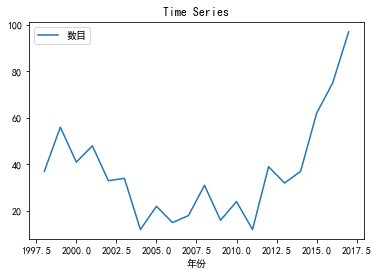

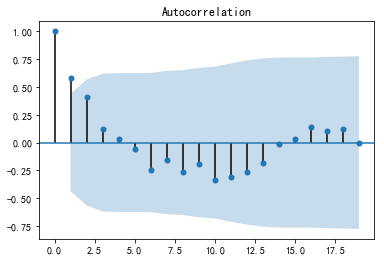

原始序列的ADF检验结果为： (0.0, 0.958532086060056, 9, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, -583.181685234933)


C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [21]:
data.plot()
plt.title('Time Series')
plt.show()
plot_acf(data)
plt.show()
print(u'原始序列的ADF检验结果为：',ADF(data[u'数目']))

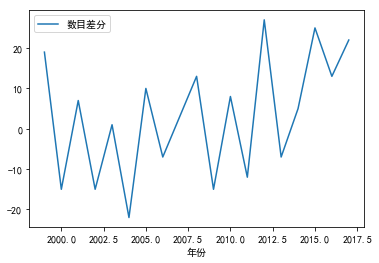

1阶差分序列的ADF检验结果为： (0.0, 0.958532086060056, 8, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, -555.2382162072479)


C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


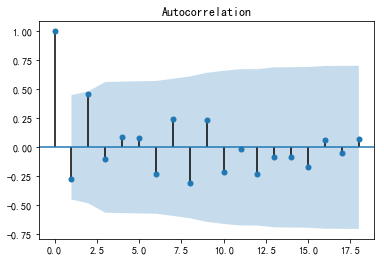

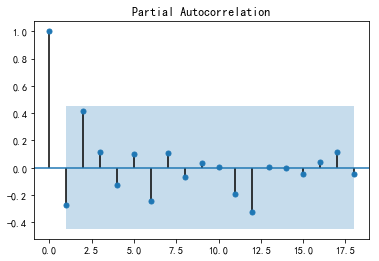

In [17]:
D_data=data.diff(periods=1).dropna()
D_data.columns=[u'数目差分']
D_data.plot()
plt.show()
plot_acf(D_data).show()
plot_pacf(D_data).show()
print(u'1阶差分序列的ADF检验结果为：',ADF(D_data[u'数目差分']))

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：',acorr_ljungbox(D_data,lags=1))

差分序列的白噪声检验结果为： (array([1.67003802]), array([0.19625344]))


In [19]:
from statsmodels.tsa.arima_model import ARIMA
data[u'数目'] = data[u'数目'].astype(float)
pmax=int(len(D_data)/10)
qmax=int(len(D_data)/10)
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix)
p,q=bic_matrix.stack().idxmin()
print(u'bic最小的P值和q值为：%s、%s'%(p,q))

      0     1
0  None  None
1  None  None


TypeError: reduction operation 'argmin' not allowed for this dtype

In [10]:
model=ARIMA(data,(p,1,q)).fit()
model.summary2()
forecast=model.forecast(1)
print(forecast)

(array([4873.9667493]), array([73.08574293]), array([[4730.72132537, 5017.21217324]]))


C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsd